In [354]:
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from shapely import wkt
from tqdm import tqdm
from functions import *
import glob


In [393]:
import scipy as scp

In [350]:
sqm2sqmi = 3.86102E-7
mi2m = 1609.34
cook_crs = cook_tracts.crs

In [314]:
cook_tracts = geopandas.read_file("cook_tracts/cook.shp")


In [315]:
cook_tracts.head()

,GEOID,NAME,variable,value,geometry
0,17031824702,"Census Tract 8247.02, Cook County, Illinois",P1_001N,5453.0,"POLYGON ((-87.71756 41.62181, -87.71295 41.625..."
1,17031820604,"Census Tract 8206.04, Cook County, Illinois",P1_001N,3689.0,"POLYGON ((-87.84352 41.74630, -87.84240 41.746..."
2,17031827300,"Census Tract 8273, Cook County, Illinois",P1_001N,2277.0,"POLYGON ((-87.65595 41.60628, -87.65595 41.608..."
3,17031828701,"Census Tract 8287.01, Cook County, Illinois",P1_001N,3780.0,"POLYGON ((-87.64095 41.55334, -87.64095 41.557..."
4,17031829800,"Census Tract 8298, Cook County, Illinois",P1_001N,6891.0,"POLYGON ((-87.69420 41.55716, -87.68941 41.557..."


In [316]:
cook_tracts["area"] = cook_tracts.to_crs(epsg=32616).area*sqm2sqmi

In [317]:
cook_tracts['density'] = cook_tracts['value']/cook_tracts['area']

In [318]:
cook_tracts = cook_tracts.sort_values('density', ascending=False)
cook_tracts.head()

,GEOID,NAME,variable,value,geometry,area,density
1195,17031030702,"Census Tract 307.02, Cook County, Illinois",P1_001N,2318.0,"POLYGON ((-87.65514 41.98188, -87.65437 41.981...",0.007998,289810.646062
1198,17031081100,"Census Tract 811, Cook County, Illinois",P1_001N,4187.0,"POLYGON ((-87.62999 41.90392, -87.62868 41.903...",0.039817,105156.271617
869,17031030104,"Census Tract 301.04, Cook County, Illinois",P1_001N,3521.0,"POLYGON ((-87.66055 41.99819, -87.65935 41.998...",0.036066,97627.109034
341,17031063302,"Census Tract 633.02, Cook County, Illinois",P1_001N,4577.0,"POLYGON ((-87.64186 41.93655, -87.63943 41.936...",0.048194,94970.460538
1245,17031063301,"Census Tract 633.01, Cook County, Illinois",P1_001N,2833.0,"POLYGON ((-87.64427 41.93425, -87.64422 41.934...",0.034773,81471.624277


In [320]:
cook_tracts.index = range(len(cook_tracts))
cook_tracts = cook_tracts.iloc[0:len(cook_tracts)-1]
cook_tracts.head()

,GEOID,NAME,variable,value,geometry,area,density
0,17031030702,"Census Tract 307.02, Cook County, Illinois",P1_001N,2318.0,"POLYGON ((-87.65514 41.98188, -87.65437 41.981...",0.007998,289810.646062
1,17031081100,"Census Tract 811, Cook County, Illinois",P1_001N,4187.0,"POLYGON ((-87.62999 41.90392, -87.62868 41.903...",0.039817,105156.271617
2,17031030104,"Census Tract 301.04, Cook County, Illinois",P1_001N,3521.0,"POLYGON ((-87.66055 41.99819, -87.65935 41.998...",0.036066,97627.109034
3,17031063302,"Census Tract 633.02, Cook County, Illinois",P1_001N,4577.0,"POLYGON ((-87.64186 41.93655, -87.63943 41.936...",0.048194,94970.460538
4,17031063301,"Census Tract 633.01, Cook County, Illinois",P1_001N,2833.0,"POLYGON ((-87.64427 41.93425, -87.64422 41.934...",0.034773,81471.624277


In [321]:
cook_tracts.iloc[len(cook_tracts)-1]

GEOID                                             17031980000
NAME                 Census Tract 9800, Cook County, Illinois
variable                                              P1_001N
value                                                     0.0
geometry    POLYGON ((-87.940247 42.007172, -87.939247 42....
area                                                 7.707806
density                                                   0.0
Name: 1330, dtype: object

In [359]:
cook_tracts.to_file('processed_data/cook')

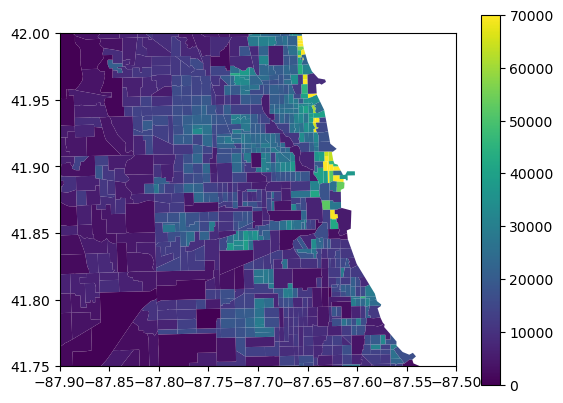

In [323]:
cook_tracts.plot("density", legend=True,vmax = 70000)
plt.ylim((41.75,42))
plt.xlim((-87.9,-87.5))

plt.show()

In [324]:
cta = geopandas.read_file("CTARailLines/CTARailLines.shp")
cta = cta.to_crs(cook_tracts.crs)
cta.head()

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,geometry
0,230,Cumberland,Blue Line,5800 N. Cumberland Avenue,1,1,1.118914e+06,1.937256e+06,POINT (-87.83803 41.98429)
1,1350,Oak Park-Lake,Green Line (Lake),100 S. Oak Park Avenue,0,0,1.131166e+06,1.901870e+06,POINT (-87.79378 41.88699)
2,1260,Austin-Lake,Green Line (Lake),351 N. Austin Blvd,0,0,1.136515e+06,1.902016e+06,POINT (-87.77414 41.88729)
3,170,Ashland-Lake,"Green (Lake), Pink",1601 W. Lake Street,1,0,1.165707e+06,1.901502e+06,POINT (-87.66695 41.88531)
4,1160,Clinton-Lake,"Green (Lake), Pink",540 W. Lake Street,1,0,1.172562e+06,1.901699e+06,POINT (-87.64177 41.88570)


In [325]:
cta_ridership = pd.read_csv("CTA_Average_Rail_Station_Ridership_1999_2022_4.csv")
cta_ridership = cta_ridership[cta_ridership['YEAR'] == 2019]
cta_ridership = cta_ridership[cta_ridership['MONTH'] == 1]
cta_ridership = cta_ridership[cta_ridership['DAY_TYPE'] == "Weekday"]
cta_ridership = cta_ridership[["RIDERSHIP_ID","DAILY_AVG_RIDES"]]
cta_ridership= cta_ridership.rename({'RIDERSHIP_ID': 'STATION_ID'}, axis=1)
cta_ridership.head()

,STATION_ID,DAILY_AVG_RIDES
698,830,1441
1556,1120,1355
2414,120,2492
3272,1270,808
4130,1230,2296


In [326]:
cta = pd.merge(cta,cta_ridership,how="inner",on="STATION_ID")
cta.head()

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,geometry,DAILY_AVG_RIDES
0,230,Cumberland,Blue Line,5800 N. Cumberland Avenue,1,1,1.118914e+06,1.937256e+06,POINT (-87.83803 41.98429),3665
1,1350,Oak Park-Lake,Green Line (Lake),100 S. Oak Park Avenue,0,0,1.131166e+06,1.901870e+06,POINT (-87.79378 41.88699),1313
2,1260,Austin-Lake,Green Line (Lake),351 N. Austin Blvd,0,0,1.136515e+06,1.902016e+06,POINT (-87.77414 41.88729),1561
3,170,Ashland-Lake,"Green (Lake), Pink",1601 W. Lake Street,1,0,1.165707e+06,1.901502e+06,POINT (-87.66695 41.88531),2040
4,1160,Clinton-Lake,"Green (Lake), Pink",540 W. Lake Street,1,0,1.172562e+06,1.901699e+06,POINT (-87.64177 41.88570),3930


In [356]:
cta

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,geometry,DAILY_AVG_RIDES,walkshed
0,230,Cumberland,Blue Line,5800 N. Cumberland Avenue,1,1,1.118914e+06,1.937256e+06,POINT (-87.83803 41.98429),3665,"POLYGON ((-87.82831 41.98436, -87.82835 41.983..."
1,1350,Oak Park-Lake,Green Line (Lake),100 S. Oak Park Avenue,0,0,1.131166e+06,1.901870e+06,POINT (-87.79378 41.88699),1313,"POLYGON ((-87.78409 41.88705, -87.78412 41.886..."
2,1260,Austin-Lake,Green Line (Lake),351 N. Austin Blvd,0,0,1.136515e+06,1.902016e+06,POINT (-87.77414 41.88729),1561,"POLYGON ((-87.76444 41.88736, -87.76448 41.886..."
3,170,Ashland-Lake,"Green (Lake), Pink",1601 W. Lake Street,1,0,1.165707e+06,1.901502e+06,POINT (-87.66695 41.88531),2040,"POLYGON ((-87.65725 41.88537, -87.65729 41.884..."
4,1160,Clinton-Lake,"Green (Lake), Pink",540 W. Lake Street,1,0,1.172562e+06,1.901699e+06,POINT (-87.64177 41.88570),3930,"POLYGON ((-87.63207 41.88576, -87.63211 41.885..."
...,...,...,...,...,...,...,...,...,...,...,...
139,320,Division/Milwaukee,Blue Line,1200 N. Milwaukee Avenue,0,0,1.165779e+06,1.908078e+06,POINT (-87.66650 41.90336),5551,"POLYGON ((-87.65680 41.90341, -87.65683 41.902..."
140,450,95th/Dan Ryan,Red Line,14 W. 95th Street,1,0,1.177779e+06,1.842222e+06,POINT (-87.62441 41.72238),7984,"POLYGON ((-87.61474 41.72243, -87.61478 41.721..."
141,910,63rd-Dan Ryan,Red Line,220 W. 63rd Street,1,0,1.175808e+06,1.863400e+06,POINT (-87.63100 41.78053),2561,"POLYGON ((-87.62132 41.78059, -87.62136 41.779..."
142,1170,Garfield-Dan Ryan,Red Line,220 W. Garfield Boulevard,1,0,1.175718e+06,1.868823e+06,POINT (-87.63117 41.79542),2525,"POLYGON ((-87.62148 41.79547, -87.62152 41.794..."


In [339]:
cta['walkshed'] = cta["geometry"].apply(walkshed_poly)


In [357]:
gdf = geopandas.GeoDataFrame(cta[["STATION_ID","LONGNAME","DAILY_AVG_RIDES"]], crs = cta.crs, geometry=cta.walkshed)
gdf.head()
gdf.to_file('processed_data/cta')

/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_68336/3388454209.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('processed_data/cta')


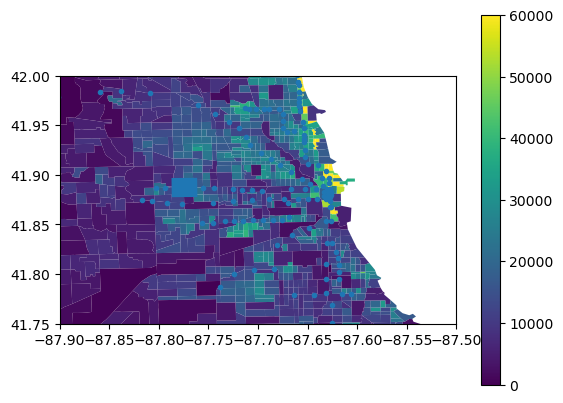

In [328]:
base = cook_tracts.plot("density", legend=True,vmax = 60000)

cta.plot(ax = base, marker = ".")
gdf = geopandas.GeoDataFrame(geometry=[cta['walkshed'][2]])
gdf.plot(ax = base)
plt.ylim((41.75,42))
plt.xlim((-87.9,-87.5))
plt.show()


In [340]:
argyle_tract = cook_tracts[cook_tracts["NAME"]=="Census Tract 312, Cook County, Illinois"]["geometry"].iat[0]
argyle_walkshed = cta[cta['LONGNAME']=="Argyle"]["walkshed"].iat[0]
argyle_density = cook_tracts[cook_tracts["NAME"]=="Census Tract 312, Cook County, Illinois"]["density"].iat[0]


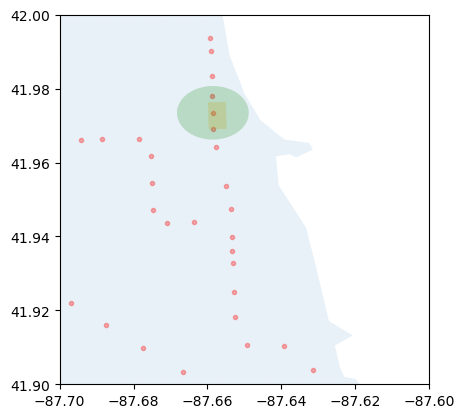

In [341]:
base = cook_tracts.plot(alpha = 0.1)
cta.plot(ax = base, color = "red",marker = '.',alpha = 0.3)
gdf = geopandas.GeoDataFrame(geometry=[argyle_tract])
gdf.plot(ax = base, color = "orange",alpha = 0.2)
gdf = geopandas.GeoDataFrame(geometry=[argyle_walkshed])
gdf.plot(ax = base, color = "green",alpha = 0.2)
plt.ylim((41.9,42))
plt.xlim((-87.7,-87.6))
plt.show()

In [343]:
tract_cont_walkshed(argyle_tract,argyle_walkshed,argyle_density)

5541.0

In [345]:
total_walkshed = 0
for i in tqdm(range(len(cook_tracts))):
    tract_poly = cook_tracts.at[i,'geometry']
    tract_density = cook_tracts.at[i,'density']
    total_walkshed = total_walkshed + tract_cont_walkshed(tract_poly, argyle_walkshed,tract_density)
    

100%|███████████████████████████████████████| 1331/1331 [00:46<00:00, 28.81it/s]


23530.80238954231

In [232]:
argyle_density

24367.314490735283

In [344]:
#gdf = geopandas.GeoDataFrame(geometry=[cook_tracts[cook_tracts["NAME"]=="Census Tract 4302, Cook County, Illinois"]["geometry"].iat[0]])
gdf = geopandas.GeoDataFrame(geometry=[argyle_walkshed])

gdf.crs=cook_tracts.crs
intersect_area = gdf.to_crs(epsg=32616).area.iat[0]*sqm2sqmi
intersect_area

0.7841329027365319

In [370]:
cta["walkshed_residents"] = np.zeros(len(cta))
cta.loc[cta["STATION_ID"]==230,"walkshed_residents"] = 1
cta.head()

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,geometry,DAILY_AVG_RIDES,walkshed,walkshed_residents
0,230,Cumberland,Blue Line,5800 N. Cumberland Avenue,1,1,1.118914e+06,1.937256e+06,POINT (-87.83803 41.98429),3665,"POLYGON ((-87.82831 41.98436, -87.82835 41.983...",1.0
1,1350,Oak Park-Lake,Green Line (Lake),100 S. Oak Park Avenue,0,0,1.131166e+06,1.901870e+06,POINT (-87.79378 41.88699),1313,"POLYGON ((-87.78409 41.88705, -87.78412 41.886...",0.0
2,1260,Austin-Lake,Green Line (Lake),351 N. Austin Blvd,0,0,1.136515e+06,1.902016e+06,POINT (-87.77414 41.88729),1561,"POLYGON ((-87.76444 41.88736, -87.76448 41.886...",0.0
3,170,Ashland-Lake,"Green (Lake), Pink",1601 W. Lake Street,1,0,1.165707e+06,1.901502e+06,POINT (-87.66695 41.88531),2040,"POLYGON ((-87.65725 41.88537, -87.65729 41.884...",0.0
4,1160,Clinton-Lake,"Green (Lake), Pink",540 W. Lake Street,1,0,1.172562e+06,1.901699e+06,POINT (-87.64177 41.88570),3930,"POLYGON ((-87.63207 41.88576, -87.63211 41.885...",0.0


In [369]:
cta["STATION_ID"]==230

0       True
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Name: STATION_ID, Length: 144, dtype: bool

In [380]:
path = "output/*.csv"
for fname in glob.glob(path):
    print(fname)
    output = open(fname).read().splitlines()
    station_name = output[0]
    station_id = int(output[1])
    walkshed_residents = output[2]
    cta.loc[cta["STATION_ID"]==station_id,"walkshed_residents"] = walkshed_residents

output/Linden.csv
output/87th.csv
output/51st.csv
output/Pulaski-Congress.csv
output/Conservatory-Central Park.csv
output/Noyes.csv
output/Thorndale.csv
output/Clinton-Lake.csv
output/Western-Congress.csv
output/Foster.csv
output/Fullerton.csv
output/Granville.csv
output/Western-Midway.csv
output/Morgan.csv
output/Damen.csv
output/Belmont-O'Hare.csv
output/LaSalle.csv
output/Rosemont.csv
output/Morse.csv
output/Irving Park-Ravenswood.csv
output/Belmont-North Main.csv
output/Berwyn.csv
output/Ridgeland.csv
output/Paulina.csv
output/Damen-Ravenswood.csv
output/Oak Park-Lake.csv
output/Jefferson Park.csv
output/Pulaski-Midway.csv
output/Kedzie-Homan.csv
output/California-Douglas.csv
output/Argyle.csv
output/Dempster.csv
output/18th.csv
output/Pulaski-Lake.csv
output/Ashland-Midway.csv
output/79th.csv
output/King Drive.csv
output/Pulaski-Douglas.csv
output/Montrose-O'Hare.csv
output/63rd-Dan Ryan.csv
output/Central-Evanston.csv
output/Indiana.csv
output/Kedzie-Ravenswood.csv
output/Garfiel

In [381]:
cta.head()

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,geometry,DAILY_AVG_RIDES,walkshed,walkshed_residents
0,230,Cumberland,Blue Line,5800 N. Cumberland Avenue,1,1,1.118914e+06,1.937256e+06,POINT (-87.83803 41.98429),3665,"POLYGON ((-87.82831 41.98436, -87.82835 41.983...",5425.960791939349
1,1350,Oak Park-Lake,Green Line (Lake),100 S. Oak Park Avenue,0,0,1.131166e+06,1.901870e+06,POINT (-87.79378 41.88699),1313,"POLYGON ((-87.78409 41.88705, -87.78412 41.886...",11834.354597219784
2,1260,Austin-Lake,Green Line (Lake),351 N. Austin Blvd,0,0,1.136515e+06,1.902016e+06,POINT (-87.77414 41.88729),1561,"POLYGON ((-87.76444 41.88736, -87.76448 41.886...",12750.101437325153
3,170,Ashland-Lake,"Green (Lake), Pink",1601 W. Lake Street,1,0,1.165707e+06,1.901502e+06,POINT (-87.66695 41.88531),2040,"POLYGON ((-87.65725 41.88537, -87.65729 41.884...",9542.281861983249
4,1160,Clinton-Lake,"Green (Lake), Pink",540 W. Lake Street,1,0,1.172562e+06,1.901699e+06,POINT (-87.64177 41.88570),3930,"POLYGON ((-87.63207 41.88576, -87.63211 41.885...",20385.211654427312


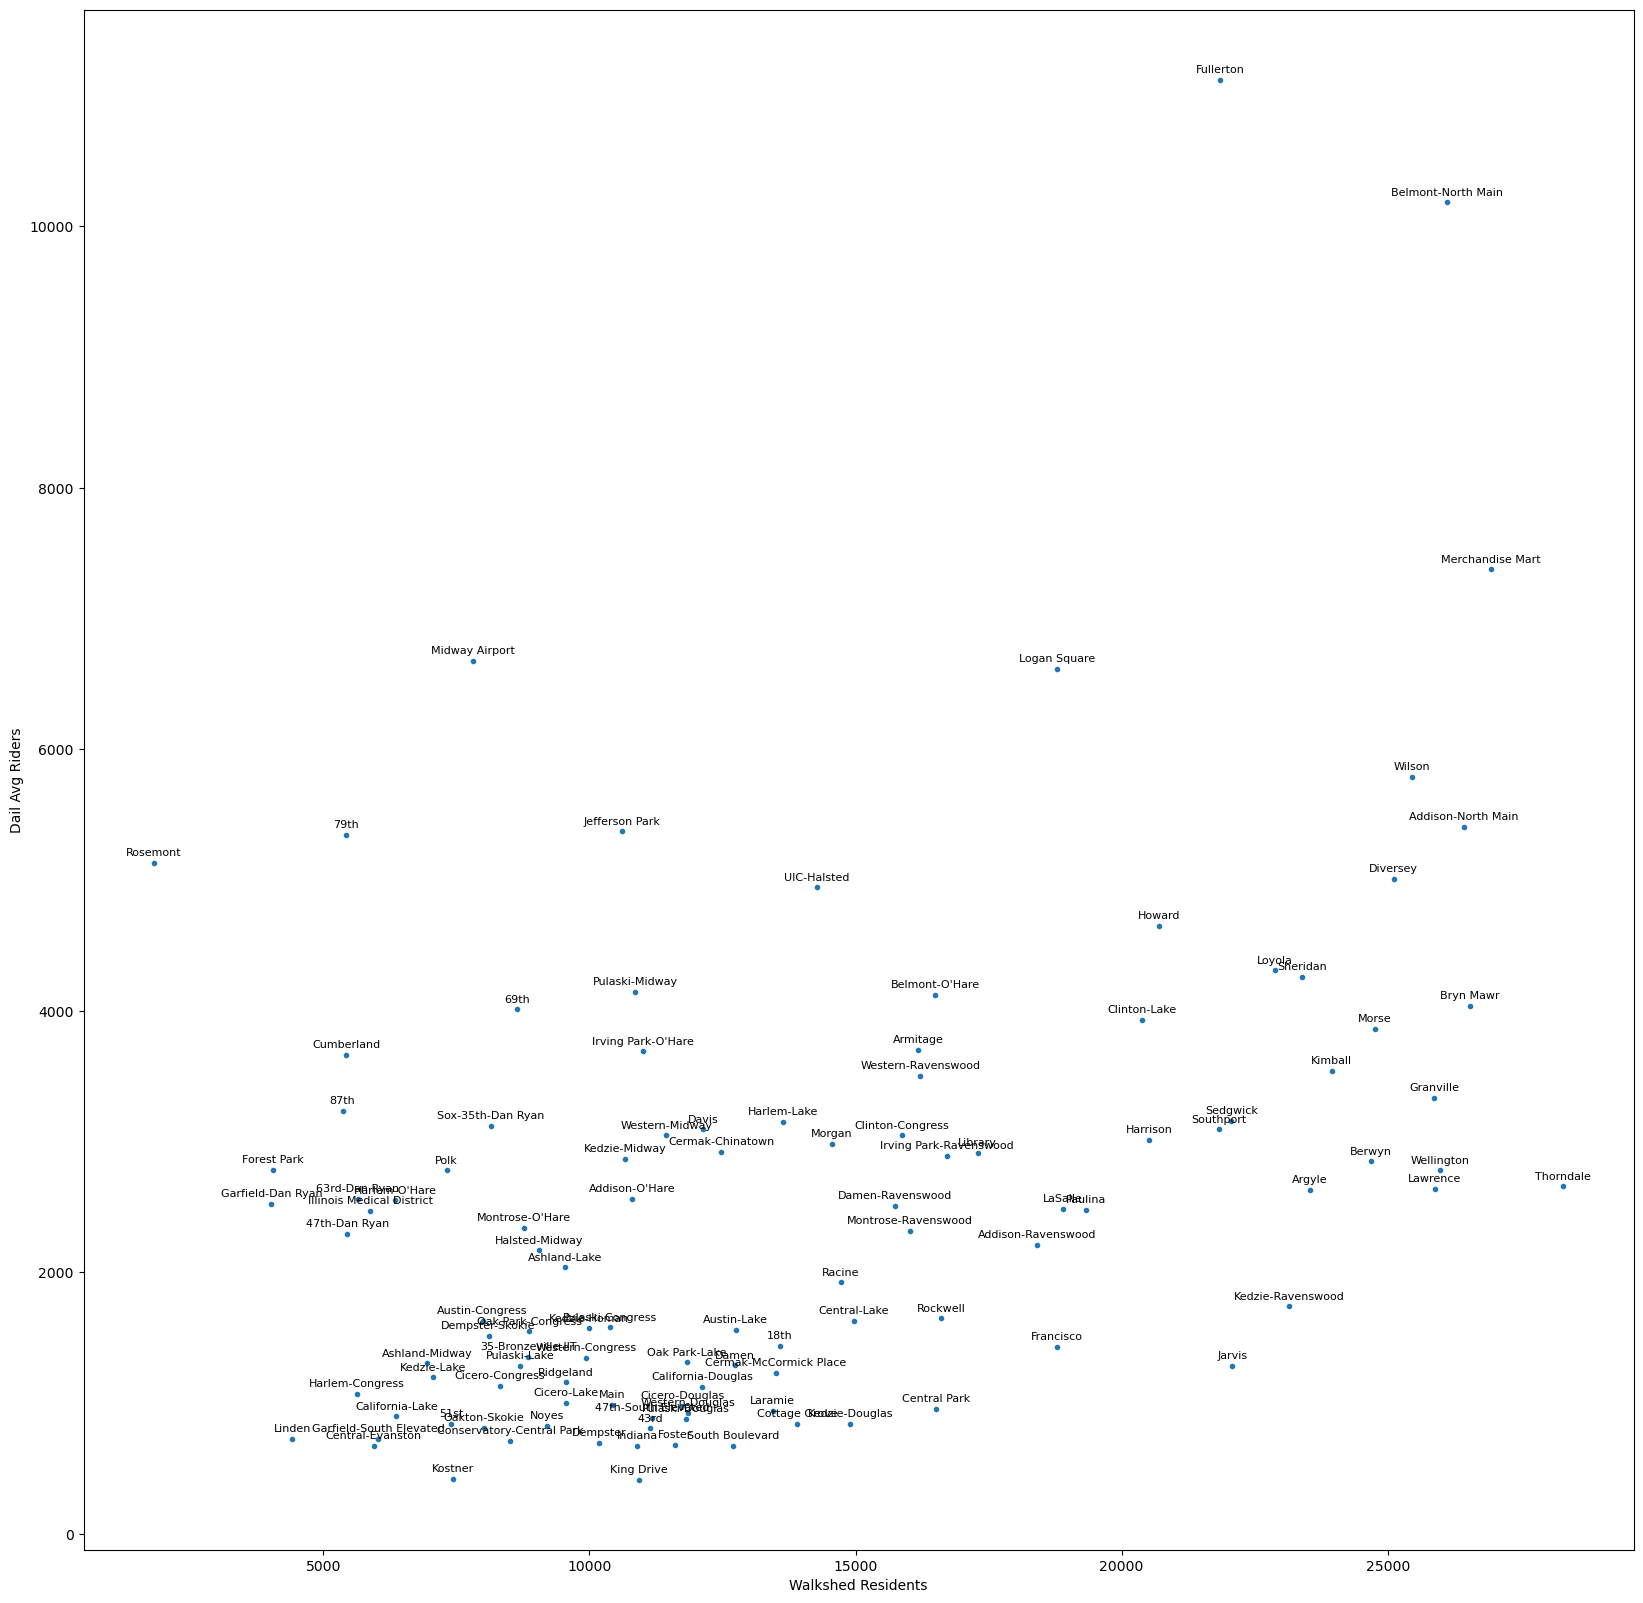

In [404]:
to_plot = cta[np.array(cta["walkshed_residents"]).astype(float) != 0]
plt.figure(figsize=(20,20))
plt.scatter(to_plot["walkshed_residents"].astype(float),to_plot["DAILY_AVG_RIDES"],marker = '.')
for x,y,label in zip(to_plot["walkshed_residents"].astype(float),
                     to_plot["DAILY_AVG_RIDES"],
                     to_plot["LONGNAME"]):

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center',
                size = 8) # horizontal alignment can be left, right or center
plt.xlabel('Walkshed Residents')
plt.ylabel('Dail Avg Riders')

plt.show()

In [394]:
scp.stats.pearsonr(np.array(to_plot["walkshed_residents"]).astype(float),np.array(to_plot["DAILY_AVG_RIDES"]))

PearsonRResult(statistic=0.43312101220171584, pvalue=1.8439004724247936e-06)

In [390]:
cta[np.array(cta["walkshed_residents"]).astype(float) == 0]["LONGNAME"]

5           Grand/Milwaukee
6         Chicago/Milwaukee
7           Damen/Milwaukee
8      California/Milwaukee
11         Chicago/Franklin
18        LaSalle/Van Buren
19               State/Lake
20               Lake/State
30             Halsted/63rd
31             Ashland/63rd
33         Roosevelt/Wabash
34           O'Hare Airport
37           North/Clybourn
54      Washington/Dearborn
59          Monroe/Dearborn
60             Quincy/Wells
88        Washington/Wabash
89            Chicago/State
90              Grand/State
99             Monroe/State
104       Western/Milwaukee
108             35th/Archer
112             54th/Cermak
125              Clark/Lake
126        Jackson/Dearborn
127          Clark/Division
133        Washington/Wells
135            Adams/Wabash
136           Jackson/State
139      Division/Milwaukee
140           95th/Dan Ryan
143         Roosevelt/State
Name: LONGNAME, dtype: object

In [384]:
cta["walkshed_residents"]

0       5425.960791939349
1      11834.354597219784
2      12750.101437325153
3       9542.281861983249
4      20385.211654427312
              ...        
139                   0.0
140                   0.0
141     5647.540662312048
142    4026.5235159917215
143                   0.0
Name: walkshed_residents, Length: 144, dtype: object